# Python - Portfolio Optimization

### 1. Craft an all-weather portfolio. Pick a portfolio of stocks following an investment theme that has stood and will stand the test of time. Extract the data from Yahoo Finance and explore the statistical distribution of each stock's past 5-year returns.

In [1]:
# Install yahoo finance API package
# !pip install yfinance --upgrade --no-cache-dir

In [2]:
# Import the necessary packages
import yfinance as yf
import datetime as dt 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Pick a list of stocks that form your all-weather portfolio
# Draw data for the past five years

#Illustrative, change into yours!
symbols_list = ["MSFT", "AMZN", "GOOG", "COST", "INTC", "BTC-USD", "D05.SI"]  
trading_days_per_year = 252

start = dt.datetime(2017,8,31)
end = dt.datetime(2022,8,31)
data = yf.download(symbols_list, start=start, end=end)

[*********************100%***********************]  7 of 7 completed


In [4]:
# Explore the dataframe with .info()
# Find out more about the method with help!
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2017-08-30 to 2022-08-30
Freq: D
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, AMZN)     1259 non-null   float64
 1   (Adj Close, BTC-USD)  1827 non-null   float64
 2   (Adj Close, COST)     1259 non-null   float64
 3   (Adj Close, D05.SI)   1257 non-null   float64
 4   (Adj Close, GOOG)     1259 non-null   float64
 5   (Adj Close, INTC)     1259 non-null   float64
 6   (Adj Close, MSFT)     1259 non-null   float64
 7   (Close, AMZN)         1259 non-null   float64
 8   (Close, BTC-USD)      1827 non-null   float64
 9   (Close, COST)         1259 non-null   float64
 10  (Close, D05.SI)       1257 non-null   float64
 11  (Close, GOOG)         1259 non-null   float64
 12  (Close, INTC)         1259 non-null   float64
 13  (Close, MSFT)         1259 non-null   float64
 14  (High, AMZN)          1259 non-null   float64


In [5]:
# Keep only the adjusted close in the dataframe
# Note that the date is in the index
prices = data["Adj Close"]

In [6]:
# Explore the trimmed dataframe with .info()
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2017-08-30 to 2022-08-30
Freq: D
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AMZN     1259 non-null   float64
 1   BTC-USD  1827 non-null   float64
 2   COST     1259 non-null   float64
 3   D05.SI   1257 non-null   float64
 4   GOOG     1259 non-null   float64
 5   INTC     1259 non-null   float64
 6   MSFT     1259 non-null   float64
dtypes: float64(7)
memory usage: 114.2 KB


In [7]:
# Calculate return using method pct_change
# Find out more about .pct_change with help! 
daily_returns = prices.pct_change()

In [8]:
# deep dive into the first five rows of observations in the dataframe
daily_returns.head()

,AMZN,BTC-USD,COST,D05.SI,GOOG,INTC,MSFT
Date,,,,,,,
2017-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-31,0.013446,0.030248,0.014892,NaN,0.010499,0.005159,0.010269
2017-09-01,-0.002396,0.040103,0.009570,0.0,-0.002119,0.000570,-0.011101
2017-09-02,0.000000,-0.064031,0.000000,0.0,0.000000,0.000000,0.000000
2017-09-03,0.000000,0.000915,0.000000,0.0,0.000000,0.000000,0.000000


In [9]:
# Print the daily return mean of each asset
print("Daily Return Mean of Each Asset:")
print(daily_returns.mean())

# Print the daily return standard deviation of each asset
print("\nDaily Return Standard Deviation of Each Asset:")
print(daily_returns.std())

# Print the skewness of each asset 
print("\nSkewness of Each Asset:")
print(daily_returns.skew())

# Print the kurtosis of each asset
print("\nKurtosis of Each Asset")
print(daily_returns.kurtosis())

Daily Return Mean of Each Asset:
AMZN       0.000698
BTC-USD    0.001653
COST       0.000784
D05.SI     0.000439
GOOG       0.000593
INTC       0.000216
MSFT       0.000850
dtype: float64

Daily Return Standard Deviation of Each Asset:
AMZN       0.017985
BTC-USD    0.041000
COST       0.012353
D05.SI     0.010823
GOOG       0.015614
INTC       0.019262
MSFT       0.015581
dtype: float64

Skewness of Each Asset:
AMZN       0.180609
BTC-USD   -0.139819
COST      -0.219175
D05.SI     0.501830
GOOG       0.049759
INTC      -0.375382
MSFT       0.036717
dtype: float64

Kurtosis of Each Asset
AMZN        8.884449
BTC-USD     6.727931
COST       14.960105
D05.SI      9.424507
GOOG        7.412314
INTC       18.185476
MSFT       12.566915
dtype: float64


### 2. Build an equally-weighted all-weather portfolio of your stock picks. Then, deep dive into the return characteristics of the portfolio (i.e., annualized portfolio return and volatility, portfolio's Sharpe ratio, portfolio's daily return profile - mean, volatility, skewness, kurtosis). Finally, draw the cumulative return of your all-weather portfolio for the past five years.

In [10]:
# Create a function which can perform all of the above given the weights of the portfolio and its daily returns
# The function also takes a sting "portfolio type" which is used in the output for readability 
def analyse_portfolio(weights, daily_returns, portfolio_type):
    
    # Print portfolio type
    print(portfolio_type + ":\n")
    
    # Calculate individual mean returns 
    daily_return_mean = daily_returns.mean()
    
    # Calculate expected portfolio performance
    daily_port_performance = np.sum(weights * daily_return_mean)

    # Calculate annual expected portfolio performance
    # There are 252 trading days in a year
    annualised_return = daily_port_performance * trading_days_per_year 

    # Print the portfolio return
    print("The annual expected portfolio return is: " + str(annualised_return))

    # Calculate the covariance matrix 
    cov_matrix = daily_returns.cov()
    # Calculate the portfolio variance
    port_variance = np.dot(weights.T, cov_matrix.dot(weights))

    # Calculate the standard deviation by taking the square root
    port_standard_dev = np.sqrt(port_variance)

    # Calculate the annualized portfolio standard deviation
    annualised_port_standard_dev = port_standard_dev * np.sqrt(trading_days_per_year)

    # Print the annualized portfolio standard deviation
    print("The annualised portfolio standard deviation is: " + str(annualised_port_standard_dev))

    # Assume the 10-year US Treasury yield as the risk-free rate
    # Snapshot at September 2, 2022
    risk_free = 0.032

    # Calculate the Sharpe ratio
    sharpe_ratio = (annualised_return - risk_free) / annualised_port_standard_dev

    # Print the Sharpe ratio of the portfolio
    print("The sharpe ratio of the portfolio is: " + str(sharpe_ratio))
    
    # Create portfolio daily returns
    daily_returns_new = daily_returns.copy()
    daily_returns_new['Portfolio'] = daily_returns_new.dot(weights)
    
    # Print the portfolio daily return mean
    print("\nThe portfolio daily return mean is: " + str(daily_returns_new['Portfolio'].mean()))

    # Print the portfolio daily return standard deviation
    print("The portfolio daily return  standard deviation is: " + str(daily_returns_new['Portfolio'].std()))

    # Print the portfolio daily return skewness 
    print("The portfolio daily return skewness is: " + str(daily_returns_new['Portfolio'].skew()))

    # Print the portfolio daily return kurtosis
    print("The portfolio daily return kurtosis is: " + str(daily_returns_new['Portfolio'].kurtosis()))
    
    # Calculate cumulative returns
    # Hint: Use .cumprod()
    daily_cum_return = (1 + daily_returns_new).cumprod()
    
    # Plot the cumulative returns since inception
    fig, ax = plt.subplots()
    ax.plot(daily_cum_return.index, daily_cum_return.Portfolio, color = 'blue', label = 'portfolio')
    ax.set_xlabel('Year')
    ax.set_ylabel('Return (%)')
    plt.legend()
    plt.show()

### _Equal Weight Portfolio_

[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
EQUAL WEIGHT PORTFOLIO:

The annual expected portfolio return is: 0.18838335265575784
The annualised portfolio standard deviation is: 0.19767903913677104
The sharpe ratio of the portfolio is: 0.7910972925539093

The portfolio daily return mean is: 0.0007413127260669959
The portfolio daily return  standard deviation is: 0.012453038266889954
The portfolio daily return skewness is: -0.6178022811253094
The portfolio daily return kurtosis is: 10.900736762355479


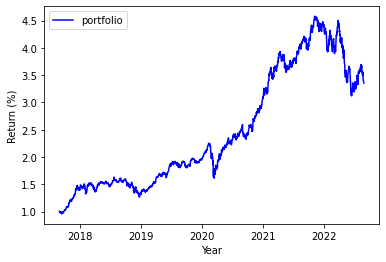

In [11]:
# Equal weights for the portfolio
# Hint: Use np.array for the weights of the assets, take note of the sequence in the dataframe
equal_weightage = 1 / len(symbols_list)
weights = np.repeat(equal_weightage, len(symbols_list))

#Call the analyse portfolio function which we defined earlier
analyse_portfolio(weights, daily_returns, "EQUAL WEIGHT PORTFOLIO")

### 3. Repeat (2) but with the maximum Sharpe portfolio and minimum volatility portfolio.

In [12]:
# Install PyPortfolioOpt package
# !pip install PyPortfolioOpt

In [13]:
# Import the packages 
from pypfopt import risk_models
from z import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

# Calculate expected returns mu 
mu = expected_returns.mean_historical_return(prices)

# Calculate the covariance matrix sigma
sigma = risk_models.sample_cov(prices)

### _Max Sharpe Portfolio_:

In [14]:
# Obtain the efficient frontier
ef1 = EfficientFrontier(mu, sigma)

# Calculate the weights of your stock picks for the maximum Sharpe ratio portfolio
raw_weights_maxsharpe = ef1.max_sharpe()

# Convert the ordered dictionary into a numpy array
# Return a group of the key-value
# pairs in the dictionary
cleaned_weights_maxsharpe = ef1.clean_weights()
print("Max Sharpe weights array:")
print(cleaned_weights_maxsharpe)  

# Convert object to a list
list_tmp = list(cleaned_weights_maxsharpe.values())
  
# Convert list to a numpy array
max_sharpe_weights_array = np.array(list_tmp)

Max Sharpe weights array:
OrderedDict([('AMZN', 0.0), ('BTC-USD', 0.02745), ('COST', 0.50226), ('D05.SI', 0.34384), ('GOOG', 0.0), ('INTC', 0.0), ('MSFT', 0.12645)])


[0.02745 0.50226 0.34384 0.12645]
MAX SHARPE PORTFOLIO:

The annual expected portfolio return is: 0.1757995753235395
The annualised portfolio standard deviation is: 0.13943459574750555
The sharpe ratio of the portfolio is: 1.031304853380421

The portfolio daily return mean is: 0.0006926519065969147
The portfolio daily return  standard deviation is: 0.00878290442128178
The portfolio daily return skewness is: -0.6120514242071774
The portfolio daily return kurtosis is: 10.691865969469664


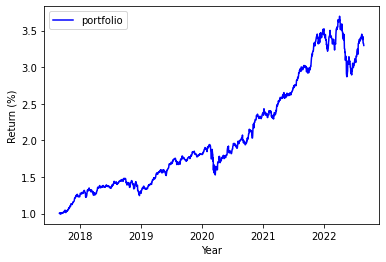

In [15]:
# Subset the daily return panel
# Note: A handful of stock pic1ks have no allocation (i.e., zero portfolio weight)

boolean_array = max_sharpe_weights_array > 0
daily_returns_subset = daily_returns.loc[:, boolean_array]

#Remove zero element(s) from the weight array
max_sharpe_weights_array = max_sharpe_weights_array[max_sharpe_weights_array != 0] 

print(max_sharpe_weights_array)

#Call the analyse portfolio function which we defined earlier
analyse_portfolio(max_sharpe_weights_array, daily_returns_subset, "MAX SHARPE PORTFOLIO")

### _Minimum Volatility Portfolio_:

In [21]:
# Obtain the efficient frontier
ef2 = EfficientFrontier(mu, sigma)

# Calculate the weights of your stock picks for the minimum variance portfolio
raw_weights_maxsharpe = ef2.min_volatility()

# Convert the ordered dictionary into a numpy array
# Return a group of the key-value
# pairs in the dictionary
cleaned_weights_min_volatility = ef2.clean_weights()
print("Min volatility weights array:")
print(cleaned_weights_min_volatility)  

# Convert object to a list
list_tmp = list(cleaned_weights_min_volatility.values())
  
# Convert list to a numpy array
min_volatility_weights_array = np.array(list_tmp)

Min volatility weights array:
OrderedDict([('AMZN', 0.00242), ('BTC-USD', 0.00975), ('COST', 0.36733), ('D05.SI', 0.54127), ('GOOG', 0.05937), ('INTC', 0.01986), ('MSFT', 0.0)])


MIN VOLATILITY PORTFOLIO:

The annual expected portfolio return is: 0.14688834494000425
The annualised portfolio standard deviation is: 0.12848791938337942
The sharpe ratio of the portfolio is: 0.8941567852554522

The portfolio daily return mean is: 0.0005795048714207671
The portfolio daily return  standard deviation is: 0.008093663714156006
The portfolio daily return skewness is: -0.39957534273858264
The portfolio daily return kurtosis is: 8.410100177774144


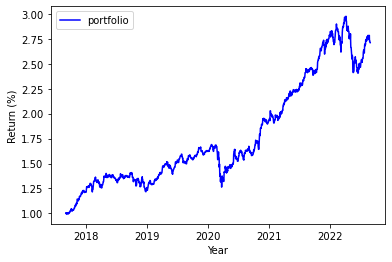

In [17]:
# Subset the daily return panel
# Note: A handful of stock pic1ks have no allocation (i.e., zero portfolio weight)

boolean_array = min_volatility_weights_array > 0
daily_returns_subset = daily_returns.loc[:, boolean_array]

#Remove zero element(s) from the weight array
min_volatility_weights_array = min_volatility_weights_array[min_volatility_weights_array != 0] 

#Call the analyse portfolio function which we defined earlier
analyse_portfolio(min_volatility_weights_array, daily_returns_subset, "MIN VOLATILITY PORTFOLIO")